In [292]:
import numpy as np
import numpy.random
from scipy.stats import gamma
from scipy.stats import norm
%matplotlib inline
from matplotlib import pylab as plt

Рассмотрим Гамма распределение

https://ru.wikipedia.org/wiki/%D0%93%D0%B0%D0%BC%D0%BC%D0%B0-%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gamma.html#scipy.stats.gamma

Гамма распределение принемает 2 параметра: $k$ и $\theta$, но в реализации гамма распределения в библиотеке scipy $\theta$ принят за 1, что можно видеть по формуле в доке scipy (С чем это связано сказать не могу, но подозреваю с тем, что $\theta$ является параметром скаляции и не связан с формой, за форму отвечает параметр $k$). 

Возьмем для исследования гамма распределение с зафиксированным значением $k$.

In [276]:
k = 2

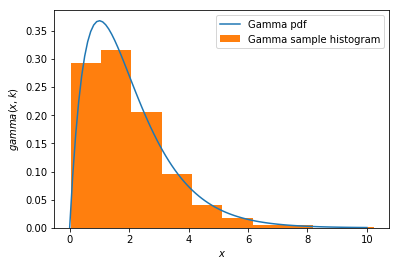

In [277]:
fig, ax = plt.subplots(1, 1)
g = gamma(k)
x = np.linspace(0, 10, 100)
hist_sample = g.rvs(size=1000) #Random variates. Generate 1000 gamma sample for histogram

ax.plot(x, g.pdf(x), label='Gamma pdf') #plot gamma density function (pdf)
ax.hist(hist_sample, normed=True, label='Gamma sample histogram') #plot gamma histogram
ax.legend(loc='best')
plt.ylabel('$gamma(x,k)$')
plt.xlabel('$x$')
plt.show()

Для гамма распределения мат ожидание и дисперсия вычисляются по формулам $k\theta$ и $k\theta^2$ соответственно. В нашем случае обе эти велечины будут равны значению параметра $k$, в чем можно удостоверится вызвав метод $stats$ у исследуемого распределения.

In [278]:
gamma.stats(k, moments='mv') #mv = mean+variance

(array(2.0), array(2.0))

In [279]:
def gamma_sample_mean_sequence(size, count):
    mean_sequence = []
    for i in range(0, count):
        sample = g.rvs(size=size)
        mean = sum(sample) / float(len(sample))
        mean_sequence.append(mean)
    return mean_sequence
        

Для нахождения параметров нормального распределения которое, согласно ЦПТ, приближает распределение выборочного среднего выборки размера $n$, воспользуемся ЦПТ:

mean = mean(gamma) = $k$

variance = variance(gamma) / n = $\frac{k}{n}$

In [321]:
def draw_means(count):
    n = count
    sample = gamma_sample_mean_sequence(n, 1000)
    plt.hist(sample, normed=True, label='Gamma sample histogram')
    
    # См принцип вычисление параметров нормального распределения выше. *1. на случай если к и n целочисленные. 
    # sqrt потому что norm принимает не дисперсию а среднеквадратичное отклонение
    sample_norm = norm(k, np.sqrt(k/(n*1.)))
    norm_x = np.linspace(0, 5,100)
    plt.plot(norm_x, sample_norm.pdf(norm_x), label='Normal with related params')
    
    plt.legend(loc='best')
    plt.ylabel('$gamma(x,k)$')
    plt.xlabel('$x$')
    plt.title('Sample of ' + str(count) + ' means')
    plt.show()

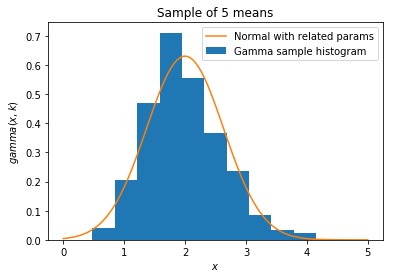

In [322]:
draw_means(5)

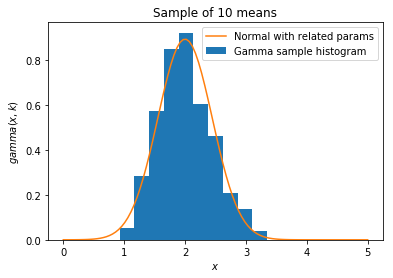

In [323]:
draw_means(10)

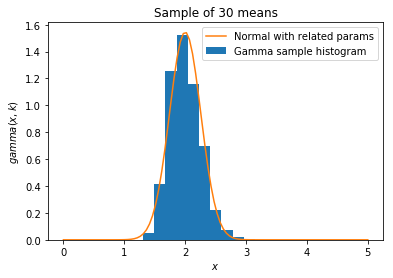

In [326]:
draw_means(30)

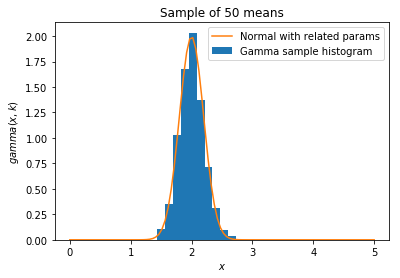

In [324]:
draw_means(50)

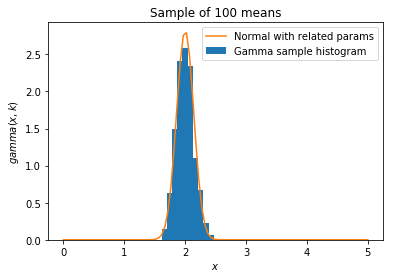

In [325]:
draw_means(100)

## Вывод
С n равными 5 и 10 точность аппроксимации не слишком хороша, видно что в реальное значение k (в близлежащую область) попадает не очень часто, а разброс велик ~1.5 и ~1 соответственно. При n равным 50 точность уже довольно хорошая, большинство значений попало в близлежащую область реального среднего значения, а разброс уменьшился до ~0.5. При выборке размера 100 картина стала еще лучше. Разница между выборками в 15 и 50 видна ярче, чем разница между выборками 50 и 100, из этого можно сделать вывод, что при дальнейшем увеличении объема выборки разница между точностью апроксимации будет видна все меньше. В принципе, эмпирическое правило n=30 соблюдается для гамма функции.